# **Intervalos de confianza y prueba de hipótesis**

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Datos**

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **Estadísticas descriptivas**

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Inferencia Estadística - Intervalos de confianza**

In [5]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
42,4.4,3.2,1.3,0.2,setosa


In [12]:
versicolor_sepal_length = iris.query('species == "versicolor"')[['sepal_length']]

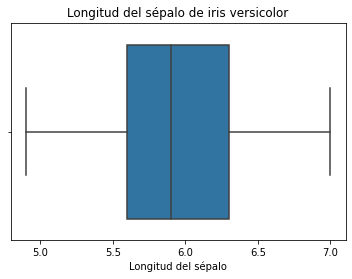

In [17]:
sns.boxplot(data=versicolor_sepal_length, x='sepal_length')
plt.xlabel('Longitud del sépalo')
plt.title('Longitud del sépalo de iris versicolor')
plt.show()

In [19]:
versicolor_sepal_length.describe()

,sepal_length
count,50.000000
mean,5.936000
std,0.516171
min,4.900000
25%,5.600000
50%,5.900000
75%,6.300000
max,7.000000


#### **Bootstraping**

Ahora usaremos la media como estadístico y procedemos a buscar su valor en la población total.

El **bootstraping** consiste en escoger valores aleatorios de la muestra y reemplazarlos, creando nuevos arrays. A estos nuevos arrays se les aplica el estadístico que estamos buscando (la media en nuestro caso).

In [22]:
def bootstrap_replicate_1d(data, func):
    # Generar replicas de los datos
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_resp(data, func, size=1):
    # Obtener replicas con bootstrap
    bs_replicate = np.empty(size)
    
    # Generar replicas
    for i in range(size):
        bs_replicate[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicate

Con esto, procedemos a “repetir el experimento” de recoger datos sobre Iris Versicolor 10000 veces y luego computar la media.

In [25]:
vers_replicates = draw_bs_resp(versicolor_sepal_length['sepal_length'], np.mean, size=10000)

Ahora calculamos los intervalos de confianzo a partir de este array

In [ ]:
ci = np.percentile(vers_replicates, [2.5, 97.5])

In [39]:
ci

array([5.794, 6.078])

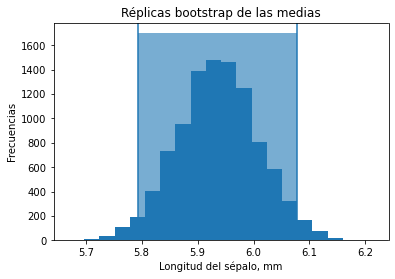

In [45]:
plt.hist(vers_replicates, bins=20)
plt.xlabel('Longitud del sépalo, mm')
plt.ylabel('Frecuencias')
plt.title('Réplicas bootstrap de las medias')

plt.axvline(x=ci[0])
plt.axvline(x=ci[1])

plt.fill_between([ci[0], ci[1]], 1700, alpha=0.6)

plt.show()

### **Inferencia Estadística - Prueba de hipótesis**

- **Hipótesis nula →** La hipótesis nula es que la diferencia observada se debe únicamente al azar.

- **Estadístico de prueba →** Un número computado a partir de los datos observados y de los datos simulados. Es para hacer una comparación.

- **Significancia estadística →** Cuando hacemos una prueba de hipótesis, buscamos significancia estadística para aceptar o rechazar. Un resultado tiene significancia estadística cuando este tiene poca probabilidad de haber ocurrido dada la hipótesis nula. Para esto usamos el valor p.

- **Valor p →** Es la probabilidad de obtener un valor que sea al menos tan extremo como el observado, considerando que la hipótesis nula sea verdadera. Para que exista significancia, el valor p debe ser menor que 0.05, o en otros casos, menor que 0.01.

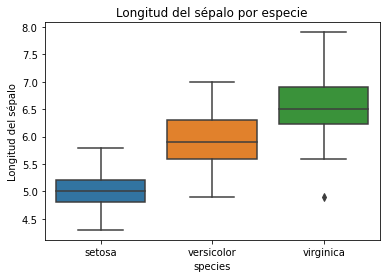

In [62]:
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.ylabel('Longitud del sépalo')
plt.title('Longitud del sépalo por especie')
plt.show()

No es del todo correcto concluir que el promedio del largo de sépalo Virginica es mayor que el largo de sépalo de Versicolor, porque esto es solo una muestra y los resultados pudieron ser solo por casualidad.

Por lo tanto, realizaremos un ejercicio de prueba de hipótesis usando Bootstrapping. Vamos a probar estadísticamente que esto no es pura coincidencia. 

#### **Prueba de hipótesis**

**Hipótesis Nula:** No existe diferencia entre el promedio de longitud del sépalo de virginica y versicolor

In [84]:
versicolor_sepal_length = iris.query('species == "versicolor"')['sepal_length']
virginica_sepal_length = iris.query('species == "virginica"')['sepal_length']

In [85]:
# Ahora, obtenemos la diferencia entre las medias observadas.
observed_diff_means = (np.mean(virginica_sepal_length.values) - np.mean(versicolor_sepal_length.values))
observed_diff_means

0.6519999999999984

El siguiente paso es mover ambos arrays para que tengan la misma media, dado que estamos simulando una hipótesis donde sus medias son iguales. Para esto:

- Concatenamos los arrays y obtenemos su media.
- Extraemos la media propia del array y agregamos la media de los datos concatenados.

In [86]:
versicolor_virgnico_concatenated = np.concatenate((versicolor_sepal_length.values, virginica_sepal_length.values))
mean_length = np.mean(versicolor_virgnico_concatenated)

In [87]:
versicolor_shifted = versicolor_sepal_length.values - np.mean(versicolor_sepal_length.values) + mean_length
virginica_shifted = virginica_sepal_length.values - np.mean(virginica_sepal_length.values) + mean_length

Simulamos 100000 muestras para ambos arrays a las que les computamos la media.

In [89]:
bs_replicate_versicolor = draw_bs_resp(versicolor_shifted, np.mean, size=100000) 
bs_replicate_virginica = draw_bs_resp(virginica_shifted, np.mean, size=100000)

Calculamos el estadístico de prueba que es la diferencia de medias:

In [90]:
bs_replicate = bs_replicate_virginica - bs_replicate_versicolor

In [96]:
observed_diff_means

0.6519999999999984

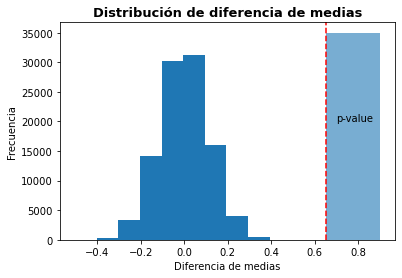

In [109]:
plt.hist(bs_replicate)

plt.axvline(x=observed_diff_means, linestyle='--', color='red')
plt.fill_between([observed_diff_means, 0.9], 35000, alpha=0.6)
plt.text(0.7, 20000, 'p-value')

plt.title('Distribución de diferencia de medias', size=13, fontweight=700)
plt.xlabel('Diferencia de medias')
plt.ylabel('Frecuencia')

plt.show()

El valor p se ubica en el extremo derecho de nuestra distribución. Lo calculamos y sacamos una conclusión a partir de esto.

In [110]:
p = np.sum(bs_replicate >= observed_diff_means) / 100000
p

0.0

Obtenemos un valor p igual a 0! Esto es **valor p < 0.005** lo que nos da significancia para no aceptar la hipótesis de que no existe diferencia entre el promedio de longitud de sépalo de Virginica y Versicolor. Por lo tanto, las diferencias observadas no son debidas al azar.